# added spacial variance

# N_particles = 10000

### The simulation was run with only one seed for the random generator.

In [3]:
import particles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import scipy

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = (20, 6)

In [6]:
files = ["./data/test_250_nm.txt", 
         "./data/test_500_nm.txt", 
         "./data/test_750_nm.txt",
         "./data/test_1000_nm.txt",
         "./data/test_1250_nm.txt",
         "./data/test_1500_nm.txt",
         "./data/test_1750_nm.txt",
         "./data/test_2000_nm.txt"]

In [7]:
time = np.arange(0,20010,10)

### particle injection slit

In [9]:
S = 20 ## mm

### the end of the media

In [10]:
L = 120 #mm

In [22]:
def mom(n, position, time, m0=m0):
    n=n
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media")
            print(time[i])
            break
        else:
            mn[i] = np.sum(position[i]**n)/m0[i]
    return mn

In [23]:
# time = np.arange(0,20100,100)
mom1x = []
mom1y = []
mom2x = []
mom2y = []
v_p= []
for f in files[:1]:
    print(f)
    p = particles.Particles(f, dimension=2, time_start=0, time_end=20000, time_step=10)
    
    
    
    m0 = []
    for i in range(p.qx.shape[1]):
        x_data = p.qx[i]
        # count particles in media that are before the outlet of the mesh
        particles_in_media = ((x_data>=0) & (x_data !=np.nan) & (x_data<=120)).sum()
        m0.append(particles_in_media)

#     n=1
#     m1x = np.zeros(p.time.shape[0])
#     m1y = np.zeros(p.time.shape[0])
#     for i in range(p.qx.shape[1]):
#         if m0[i]==0:
#             print("no more particles in the media")
#             break
#         else:
#             m1x[i] = np.sum(p.qx[i]**n)/m0[i]
#             m1y[i] = np.sum(p.qy[i]**n)/m0[i]
    
    
    m1x = mom(n=1,position=p.qx,time=p.time, m0=m0)
    m1y = mom(n=1,position=p.qx,time=p.time, m0=m0)
    m2x = mom(n=2,position=p.qx,time=p.time, m0=m0)
    m2y = mom(n=2,position=p.qx,time=p.time, m0=m0)
#     n=2
#     m2x = np.zeros(p.time.shape[0])
#     m2y = np.zeros(p.time.shape[0])
#     for i in range(p.qx.shape[1]):
#         if m0[i]==0:
#             print("no more particles in the media")
#             break
#         else:
#             m2x[i] = np.sum(p.qx[i]**n)/m0[i]
#             m2y[i] = np.sum(p.qy[i]**n)/m0[i]
# #     print(r_value)
# #     plt.plot(time, m1x, label=f)
    mom1x.append(m1x)
    mom1y.append(m1y)
    mom2x.append(m2x)
    mom2y.append(m2y)

./data/test_250_nm.txt
no more particles in the media
10780
no more particles in the media
10780


In [27]:
d =range(250,2250,250)

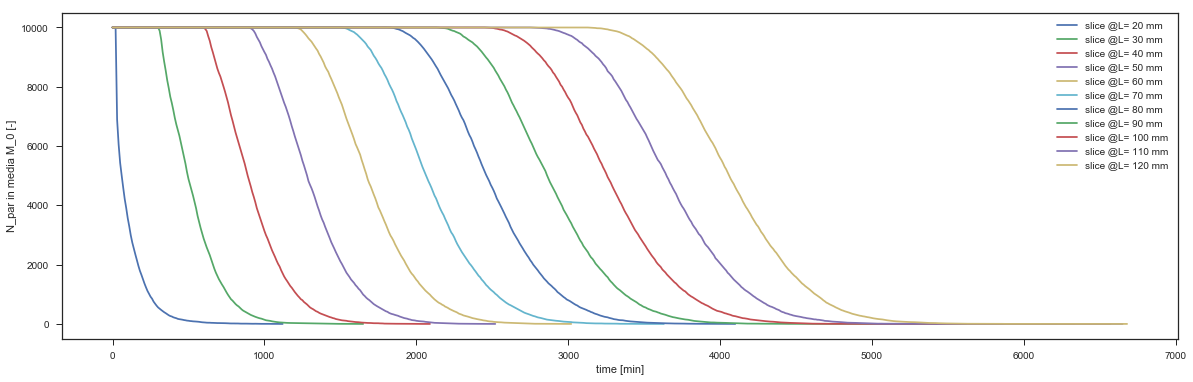

In [64]:
time = []
for l in range(20,130,10):
    m0 = []
    for i in range(p.qx.shape[1]):
        x_data = p.qx[i]
        c = ((x_data>0) & (x_data !=np.nan) & (x_data <=l)).sum()
        m0.append(c)
    m = pd.DataFrame(m0)
    m.index = p.time
    m_ = m[m[0]>1]
    plt.plot(m_, label="slice @L= {0} mm".format(l))
plt.xlabel("time [min]")
plt.ylabel("N_par in media M_0 [-]")
plt.legend()

In [62]:
p.qx[0]

0       19.0
1       19.0
2       19.0
3       19.0
4       19.0
5       19.0
6       19.0
7       19.0
8       19.0
9       19.0
10      19.0
11      19.0
12      19.0
13      19.0
14      19.0
15      19.0
16      19.0
17      19.0
18      19.0
19      19.0
20      19.0
21      19.0
22      19.0
23      19.0
24      19.0
25      19.0
26      19.0
27      19.0
28      19.0
29      19.0
        ... 
9970    19.0
9971    19.0
9972    19.0
9973    19.0
9974    19.0
9975    19.0
9976    19.0
9977    19.0
9978    19.0
9979    19.0
9980    19.0
9981    19.0
9982    19.0
9983    19.0
9984    19.0
9985    19.0
9986    19.0
9987    19.0
9988    19.0
9989    19.0
9990    19.0
9991    19.0
9992    19.0
9993    19.0
9994    19.0
9995    19.0
9996    19.0
9997    19.0
9998    19.0
9999    19.0
Name: 0, dtype: float64

## The number of particles in the media drops down to 1 particle after 5000 min.

### plot particle velocity ratios.

In [9]:
from scipy import stats

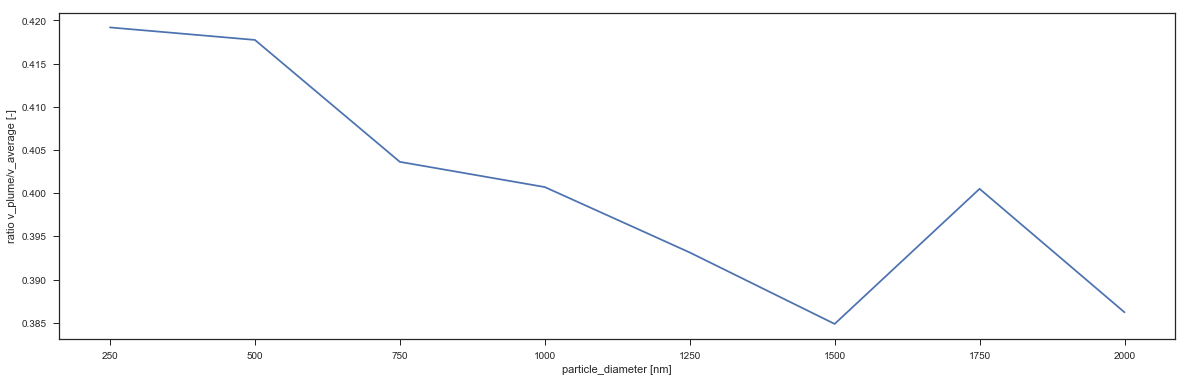

In [10]:
plume_vel=[]
v_ave = 0.000001*1000*60 #(m/s)(1000mm/1m)(60s/1min)
v_ratio = []
for m1 in mom1x:
    slope, intercept, r_value, p_value, std_err = stats.linregress(p.time[:300],m1[:300])
    v_ratio.append(slope/v_ave)
plt.plot(d,v_ratio)
plt.ylabel("ratio v_plume/v_average [-]")
plt.xlabel("particle_diameter [nm]")

# Moments Order 1

### x-direction

In [11]:
max_ = np.where(p.time==3000)[0][0]
print(max_)

300


### x-direction

In [12]:
m2x.shape

(2001,)

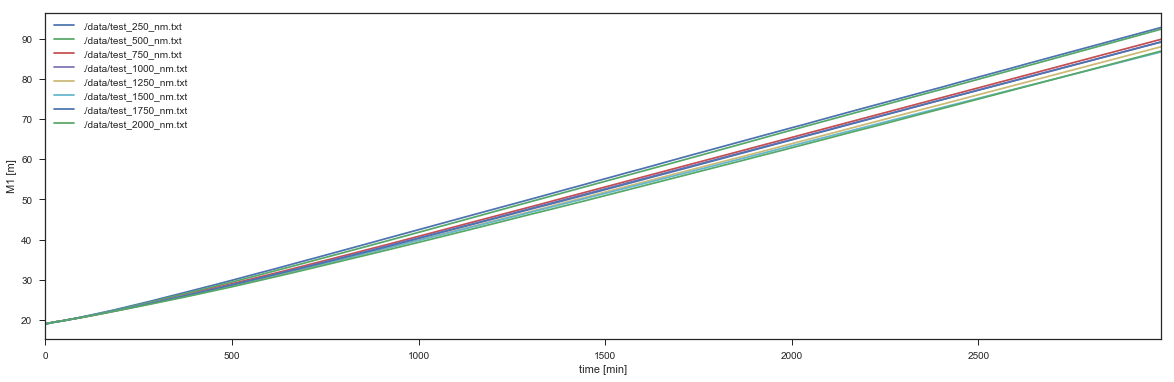

In [13]:
m1x=pd.DataFrame(mom1x[:]).T
m1x.columns = files
m1x.index = p.time
m1x.iloc[:max_].plot()
plt.ylabel("M1 [m]")
plt.xlabel("time [min]")

### y-direction

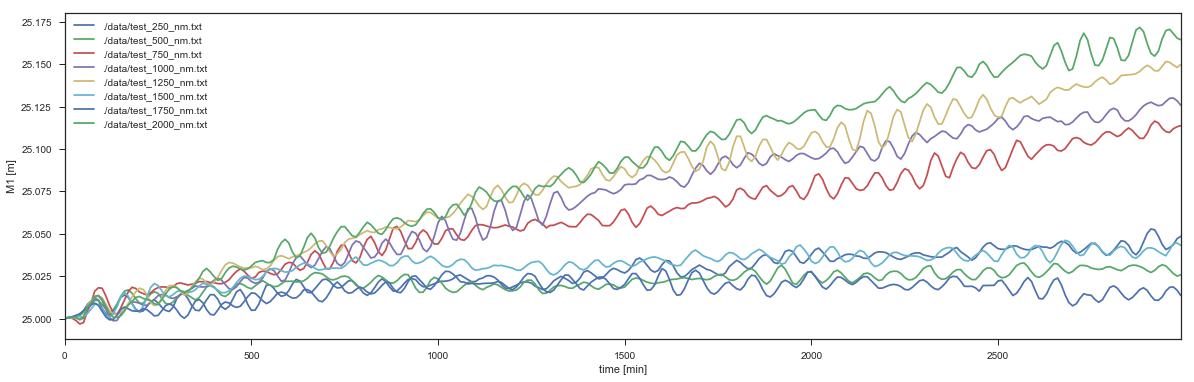

In [14]:
m1y=pd.DataFrame(mom1y[:]).T
m1y.columns = files
m1y.index = p.time
m1y.iloc[:max_].plot()
plt.ylabel("M1 [m]")
plt.xlabel("time [min]")

# Moments Order 2

### x-direction

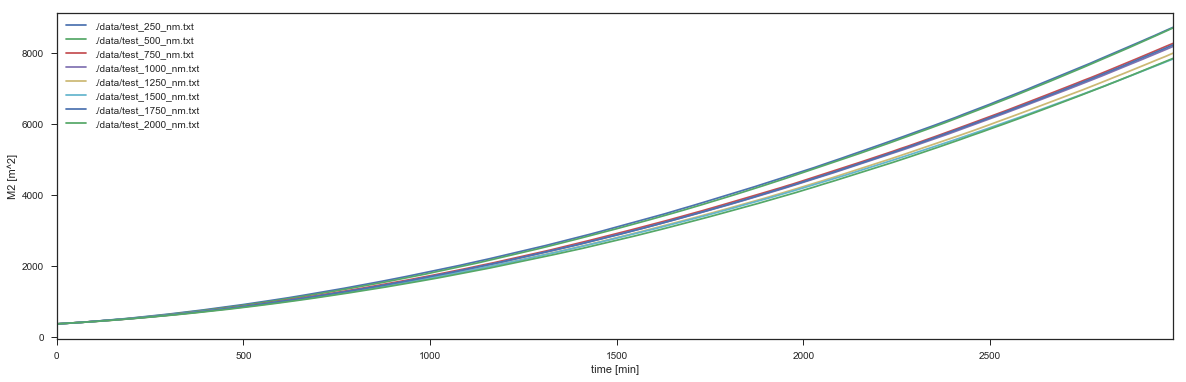

In [15]:
m2x=pd.DataFrame(mom2x[:]).T
m2x.columns = files
m2x.index = p.time
m2x.iloc[:max_].plot()
plt.ylabel("M2 [m^2]")
plt.xlabel("time [min]")

### y-direction

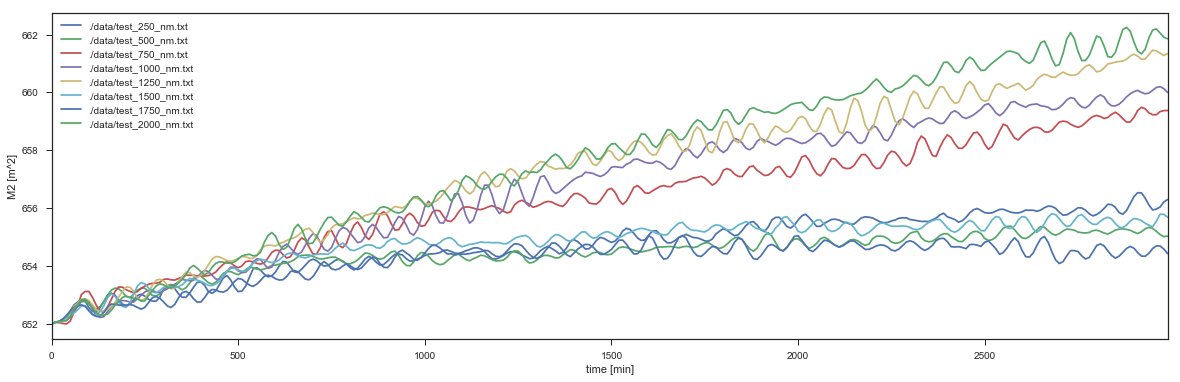

In [16]:
m2y=pd.DataFrame(mom2y[:]).T
m2y.columns = files
m2y.index = p.time
m2y.iloc[:max_].plot()
plt.ylabel("M2 [m^2]")

plt.xlabel("time [min]")

# SPATIAL VARIANCE

$${σ_x}^2= \frac{{M_2}}{{M_0}} -μ^2  ---where--- (μ = \frac{{M_1}}{{M_0}})$$

In [17]:
sx2 = m2x - m1x**2
sy2 = m2y - m1y**2

In [18]:
max_2 = np.where(p.time==3000)[0][0]
print(max_2)

300


### x-direction

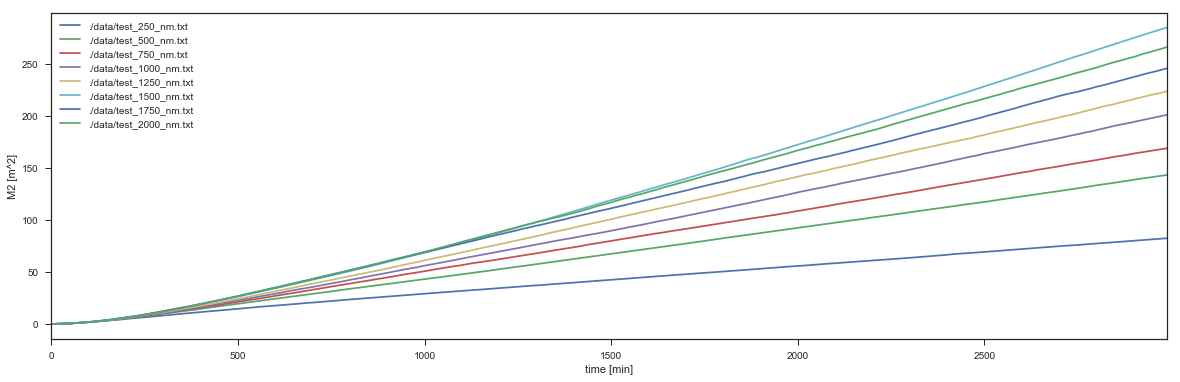

In [19]:
sx2.iloc[:max_2].plot()
plt.ylabel("M2 [m^2]")
plt.xlabel("time [min]")

### y-direction

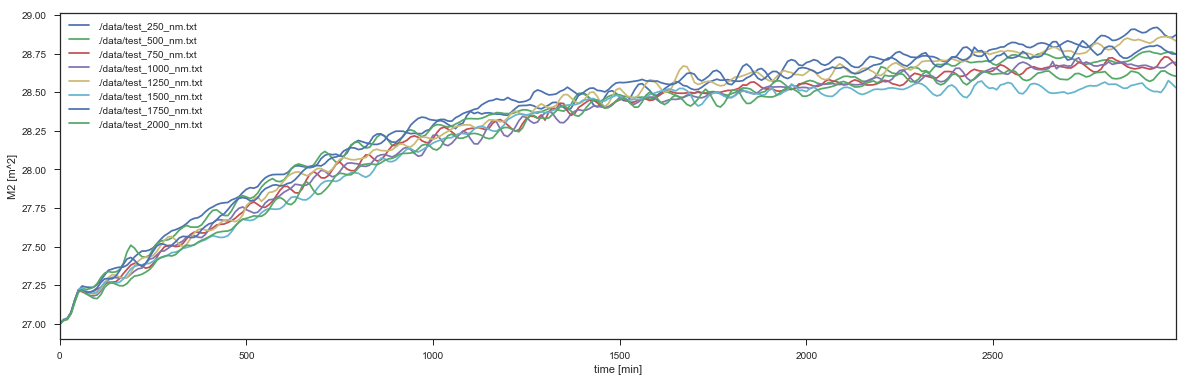

In [20]:
sy2.iloc[:max_2].plot()
plt.ylabel("M2 [m^2]")
plt.xlabel("time [min]")